<!-- dom:TITLE: Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters -->
# Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **May 30, 2018**

Copyright 1999-2018, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license





## Introduction

Our emphasis throughout this series of lectures  
is on understanding the mathematical aspects of
different algorithms used in the fields of data analysis and machine learning. 

However, where possible we will emphasize the
importance of using available software. We start thus with a hands-on
and top-down approach to machine learning. The aim is thus to start with
relevant data or data we have produced 
and use these to introduce statistical data analysis
concepts and machine learning algorithms before we delve into the
algorithms themselves. The examples we will use in the beginning, start with simple
polynomials with random noise added. We will use the Python
software package [Scikit-learn](http://scikit-learn.org/stable/) and
introduce various machine learning algorithms to make fits of
the data and predictions. We move thereafter to more interesting
cases such as the simulation of financial transactions or disease
models. These are examples where we can easily set up the data and
then use machine learning algorithms included in for example
**scikit-learn**. 

These examples will serve us the purpose of getting
started. Furthermore, they allow us to catch more than two birds with
a stone. They will allow us to bring in some programming specific
topics and tools as well as showing the power of various Python (and
R) packages for machine learning and statistical data analysis. In the
lectures on linear algebra we cover in more detail various programming
features of languages like Python and C++ (and other), we will also
look into more specific linear functions which are relevant for the
various algorithms we will discuss. Here, we will mainly focus on two
specific Python packages for Machine Learning, scikit-learn and
tensorflow (see below for links etc).  Moreover, the examples we
introduce will serve as inputs to many of our discussions later, as
well as allowing you to set up models and produce your own data and
get started with programming.





## Software and needed installations

We will make extensive use of Python as programming language and its
myriad of available libraries.  You will find
IPython/Jupyter notebooks invaluable in your work.  You can run **R**
codes in the Jupyter/IPython notebooks, with the immediate benefit of
visualizing your data. You can also use compiled languages like C++,
Rust, Fortran etc if you prefer. The focus in these lectures will be
on Python, but we will provide many code examples for those of you who
prefer R or compiled languages. You can integrate C++ codes and R in for example
a Jupyter notebook. 


If you have Python installed (we recommend Python3) and you feel
pretty familiar with installing different packages, we recommend that
you install the following Python packages via **pip** as 

1. pip install numpy scipy matplotlib ipython scikit-learn mglearn sympy pandas pillow 

For Python3, replace **pip** with **pip3**.

For OSX users we recommend, after having installed Xcode, to
install **brew**. Brew allows for a seamless installation of additional
software via for example 

1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution,
you can use **pip** as well and simply install Python as 

1. sudo apt-get install python3  (or python for pyhton2.7)

etc etc. 


## Python installers

If you don't want to perform these operations separately and venture
into the hassle of exploring how to set up dependencies and paths, we
recommend two widely used distrubutions which set up all relevant
dependencies for Python, namely 

* [Anaconda](https://docs.anaconda.com/), 

which is an open source
distribution of the Python and R programming languages for large-scale
data processing, predictive analytics, and scientific computing, that
aims to simplify package management and deployment. Package versions
are managed by the package management system **conda**. 

* [Enthought canopy](https://www.enthought.com/product/canopy/) 

is a Python
distribution for scientific and analytic computing distribution and
analysis environment, available for free and under a commercial
license.



## Installing R, C++, cython or Julia

You will also find it convenient to utilize R. Although we will mainly
use Python during lectures and in various projects and exercises, we
provide a full R set of codes for the same examples. Those of you
already familiar with R should feel free to continue using R, keeping
however an eye on the parallel Python set ups. Similarly, if you are a
Python afecionado, feel free to explore R as well.  Jupyter/Ipython
notebook allows you to run **R** codes interactively in your
browser. The software library **R** is tuned to statistically analysis
and allows for an easy usage of the tools we will discuss in these
texts.

To install **R** with Jupyter notebook 
[follow the link here](https://mpacer.org/maths/r-kernel-for-ipython-notebook)




## Installing R, C++, cython, Numba etc


For the C++ aficionados, Jupyter/IPython notebook allows you also to
install C++ and run codes written in this language interactively in
the browser. Since we will emphasize writing many of the algorithms
yourself, you can thus opt for either Python or C++ (or Fortran or other compiled languages) as programming
languages.

To add more entropy, **cython** can also be used when running your
notebooks. It means that Python with the Jupyter/IPython notebook
setup allows you to integrate widely popular softwares and tools for
scientific computing. Similarly, the 
[Numba Python package](https://numba.pydata.org/) delivers increased performance
capabilities with minimal rewrites of your codes.  With its
versatility, including symbolic operations, Python offers a unique
computational environment. Your Jupyter/IPython notebook can easily be
converted into a nicely rendered **PDF** file or a Latex file for
further processing. For example, convert to latex as

        pycod jupyter nbconvert filename.ipynb --to latex 


And to add more versatility, the Python package [SymPy](http://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS)  and is entirely written in Python. 

Finally, if you wish to use the light mark-up language 
[doconce](https://github.com/hplgit/doconce) you can convert a standard ascii text file into various HTML 
formats, ipython notebooks, latex files, pdf files etc with minimal edits.


## Simple linear regression model using **scikit-learn**

We start with perhaps our simplest possible example, using **scikit-learn** to perform linear regression analysis on a data set produced by us. 
What follows is a simple Python code where we have defined  function $y$ in terms of the variable $x$. Both are defined as vectors of dimension $1\times 100$. The entries to the vector $\hat{x}$  are given by random numbers generated with a uniform distribution with entries $x_i \in [0,1]$ (more about probability distribution functions later). These values are then used to define a function $y(x)$ (tabulated again as a vector) with a linear dependence on $x$ plus a random noise added via the normal distribution.


The Numpy functions are imported used the **import numpy as np**
statement and the random number generator for the uniform distribution
is called using the function **np.random.rand()**, where we specificy
that we want $100$ random variables.  Using Numpy we define
automatically an array with the specified number of elements, $100$ in
our case.  With the Numpy function **randn()** we can compute random
numbers with the normal distribution (mean value $\mu$ equal to zero and
variance $\sigma^2$ set to one) and produce the values of $y$ assuming a linear
dependence as function of $x$

$$
y = 2x+N(0,1),
$$

where $N(0,1)$ represents random numbers generated by the normal
distribution.  From **scikit-learn** we import then the
**LinearRegression** functionality and make a prediction $\tilde{y} =
\alpha + \beta x$ using the function **fit(x,y)**. We call the set of
data $(\hat{x},\hat{y})$ for our training data. The Python package
**scikit-learn** has also a functionality which extracts the above
fitting parameters $\alpha$ and $\beta$ (see below). Later we will
distinguish between training data and test data.

For plotting we use the Python package
[matplotlib](https://matplotlib.org/) which produces publication
quality figures. Feel free to explore the extensive
[gallery](https://matplotlib.org/gallery/index.html) of examples. In
this example we plot our original values of $x$ and $y$ as well as the
prediction **ypredict** ($\tilde{y}$), which attempts at fitting our
data with a straight line.

The Python code follows here.

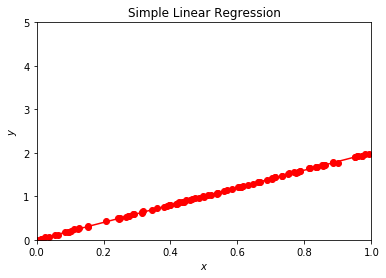

In [2]:
%matplotlib inline

# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 2*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[1]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()

This example serves several aims. It allows us to demonstrate several
aspects of data analysis and later machine learning algorithms. The
immediate visualization shows that our linear fit is not
impressive. It goes through the data points, but there are many
outliers which are not reproduced by our linear regression.  We could
now play around with this small program and change for example the
factor in front of $x$ and the normal distribution.  Try to change the
function $y$ to

$$
y = 10x+0.01 \times N(0,1),
$$

where $x$ is defined as before.  Does the fit look better? Indeed, by
reducing the role of the normal distribution we see immediately that
our linear prediction seemingly reproduces better the training
set. However, this testing 'by the eye' is obviouly not satisfactory in the
long run. Here we have only defined the training data and our model, and 
have not discussed a more rigorous approach to the **cost** function.

We need more rigorous criteria in defining whether we have succeeded or
not in modeling our training data.  You will be surprised to see that
many scientists seldomly venture beyond this 'by the eye' approach. A
standard approach for the *cost* function is the so-called $\chi^2$
function

$$
\chi^2 = \frac{1}{n}
\sum_{i=0}^{n-1}\frac{(y_i-\tilde{y}_i)^2}{\sigma_i^2},
$$

where $\sigma_i^2$ is the variance (to be defined later) of the entry
$y_i$.  We may not know the explicit value of $\sigma_i^2$, it serves
however the aim of scaling the equations and make the cost function
dimensionless.  

Minimizing the cost function is a central aspect of
our discussions to come. Finding its minima as function of the model
parameters ($\alpha$ and $\beta$ in our case) will be a recurring
theme in these series of lectures. Essentially all machine learning
algorithms we will discuss center around the minimization of the
chosen cost function. This depends in turn on our specific
model for describing the data, a typical situation in supervised
learning. Automatizing the search for the minima of the cost function is a
central ingredient in all algorithms. Typical methods which are
employed are various variants of **gradient** methods. These will be
discussed in more detail later. Again, you'll be surprised to hear that
many practitioners minimize the above function ''by the eye', popularly dubbed as 
'chi by the eye'. That is, change a parameter and see (visually and numerically) that 
the  $\chi^2$ function becomes smaller. 

There are many ways to define the cost function. A simpler approach is to look at the relative difference between the training data and the predicted data, that is we define 
the relative error as

$$
\epsilon_{\mathrm{relative}}= \frac{\vert \hat{y} -\hat{\tilde{y}}\vert}{\vert \hat{y}\vert}.
$$

We can modify easily the above Python code and plot the relative instead

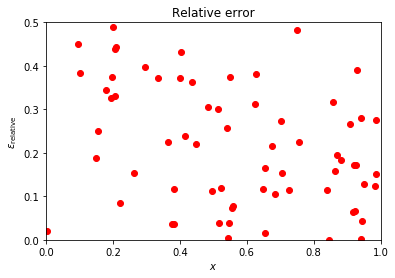

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 5*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)

plt.plot(x, np.abs(ypredict-y)/abs(y), "ro")
plt.axis([0,1.0,0.0, 0.5])
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{relative}}$')
plt.title(r'Relative error')
plt.show()

Depending on the parameter in front of the normal distribution, we may
have a small or larger relative error. Try to play around with
different training data sets and study (graphically) the value of the
relative error.

As mentioned above, **scikit-learn** has an impressive functionality.
We can for example extract the values of $\alpha$ and $\beta$ and
their error estimates, or the variance and standard deviation and many
other properties from the statistical data analysis. 

Here we show an
example of the functionality of scikit-learn.

The intercept alpha: 
 [2.00029746]
Coefficient beta : 
 [[4.99810529]]
Mean squared error: 0.00
Variance score: 1.00
Mean squared log error: 0.00
Mean absolute error: 0.01


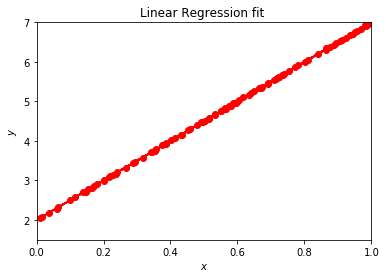

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

x = np.random.rand(100,1)
y = 2.0+ 5*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, ypredict))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, ypredict) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, ypredict))
plt.plot(x, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

The function **coef** gives us the parameter $\beta$ of our fit while **intercept** yields 
$\alpha$. Depending on the constant in front of the normal distribution, we get values near or far from $alpha =2$ and $\beta =5$. Try to play around with different parameters in front of the normal distribution. The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

The smaller the value, the better the fit. Ideally we would like to
have an MSE equal zero.  The attentive reader has probably recognized
this function as being similar to the $\chi^2$ function defined above.

The **r2score** function computes $R^2$, the coefficient of
determination. It provides a measure of how well future samples are
likely to be predicted by the model. Best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of $\hat{y}$,
disregarding the input features, would get a $R^2$ score of $0.0$.

If $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Another quantity will meet again in our discussions of regression analysis is 
 mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss or what we call the $l1$-norm loss. In our discussion above we presented the relative error.
The MAE is defined as follows

$$
\text{MAE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$

Finally we present the 
squared logarithmic (quadratic) error

$$
\text{MSLE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$

where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 

We will discuss in more
detail these and other functions in the various lectures.  We conclude this part with another example. Instead of 
a linear $x$-dependence we study now a cubic polynomial and use the polynomial regression analysis tools of scikit-learn.

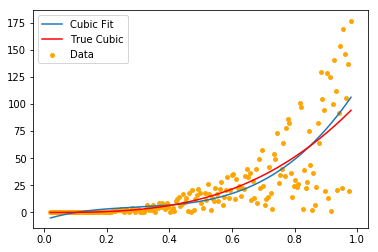

0.004999999999999996


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

x=np.linspace(0.02,0.98,200)
noise = np.asarray(random.sample((range(200)),200))
y=x**3*noise
yn=x**3*100
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
plt.plot(x,yn, color='red', label="True Cubic")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

Similarly, using **R**, we can perform similar studies. The following **R** code illustrates this.
(more details on **R** will be inserted later).

## Non-Linear Least squares in R

        set.seed(1485)
        len = 24
        x = runif(len)
        y = x^3+rnorm(len, 0,0.06)
        ds = data.frame(x = x, y = y)
        str(ds)
        plot( y ~ x, main ="Known cubic with noise")
        s  = seq(0,1,length =100)
        lines(s, s^3, lty =2, col ="green")
        m = nls(y ~ I(x^power), data = ds, start = list(power=1), trace = T)
        class(m)
        summary(m)
        power = round(summary(m)$coefficients[1], 3)
        power.se = round(summary(m)$coefficients[2], 3)
        plot(y ~ x, main = "Fitted power model", sub = "Blue: fit; green: known")
        s = seq(0, 1, length = 100)
        lines(s, s^3, lty = 2, col = "green")
        lines(s, predict(m, list(x = s)), lty = 1, col = "blue")
        text(0, 0.5, paste("y =x^ (", power, " +/- ", power.se, ")", sep = ""), pos = 4)


In our lectures on regression analysis (and other ones as well), we will discuss in more details various **R** functionalities. 


Another useful Python package is
[pandas](https://pandas.pydata.org/), which is an open source library
providing high-performance, easy-to-use data structures and data
analysis tools for Python. The following simple example shows how we can, in an easy way make tables of our data. Here we define a data set which includes names, city of residence and age, and displays the data in an easy to read way. We will see repeated use of **pandas**, in particular in connection with classification of data.

In [5]:
import pandas as pd
from IPython.display import display
data = {'Name': ["John", "Anna", "Peter", "Linda"], 'Location': ["Nairobi", "Napoli", "London", "Buenos Aires"], 'Age':[51, 21, 34, 45]}
data_pandas = pd.DataFrame(data)
display(data_pandas)

## Examples

We present here several examples, with pertinent Python codes that we
will use to illustrate various machine learning methods and ways to
analyze, from simple to complex, various data sets. Many of these
examples allow us to generate the data we want to analyze, following
much of the same philosophy we discussed above when
fitting various polynomials.

We start with a simple exponential growth model that is meant to mimick an ecoli lab experiment.
We can easily model this system and then produce the data used to train various machine learning algorithms.
Another model from the life sciences is the so-called predator-prey model from ecology. Thereafter we present 
a simple model for financial transactions before moving to a random walk model and ending with 
the simulation of velocities of a non-interacting atom or molecule confined to move in  a one-dimensional region.


### Ecoli lab experiment

A typical pattern seen in population models is that the population grows faster and faster. [Why? Is there an underlying (general) mechanism](http://www.zo.utexas.edu/courses/Thoc/PopGrowth.html)?
Here we will construct a model for cell growth based on a simple difference equation for the growth. We make the following assumptions
1. Cells divide after $T$ seconds on average (one generation)

2. $2N$ celles divide into twice as many new cells $\Delta N$ in a time
   interval $\Delta t$ as $N$ cells would: $\Delta N \propto N$

3. $N$ cells result in twice as many new individuals $\Delta N$ in
   time $2\Delta t$ as in time $\Delta t$: $\Delta N \propto\Delta t$

4. Same proportionality with respect to  death 

5. Proposed model: $\Delta N = b\Delta t N - d\Delta tN$ for some unknown
   constants $b$ (births) and $d$ (deaths)

6. Describe evolution in discrete time: $t_n=n\Delta t$

7. Program-friendly notation: $N$ at $t_n$ is $N^n$

8. Math model: $N^{n+1} = N^n + r\Delta t\, N$ (with $\ r=b-d$)

9. Program model: `N[n+1] = N[n] + r*dt*N[n]`



The difference equation can be programmed in a simple way, and in order to get started we
set $r=1.5$, $N^0=1$, $\Delta t=0.5$. The program reads

In [6]:
import numpy as np

t = np.linspace(0, 10, 21)  # 20 intervals in [0, 10]
dt = t[1] - t[0]
N = np.zeros(t.size)
N[0] = 1
r = 0.5

for n in range(0, N.size-1, 1):
    N[n+1] = N[n] + r*dt*N[n]
    print('N[%d]=%.1f' % (n+1, N[n+1]))

and it generates the following output

        N[1]=1.2
        N[2]=1.6
        N[3]=2.0
        N[4]=2.4
        N[5]=3.1
        N[6]=3.8
        N[7]=4.8
        N[8]=6.0
        N[9]=7.5
        N[10]=9.3
        N[11]=11.6
        N[12]=14.6
        N[13]=18.2
        N[14]=22.7
        N[15]=28.4
        N[16]=35.5
        N[17]=44.4
        N[18]=55.5
        N[19]=69.4
        N[20]=86.7


This forms our data which later will define our training set. 
In this case we defined the value of the parameter $r$. We could alternatively assume that we just received the 
above data file and where asked to find $r$. How can we estimate $r$ from data? This will be one of our tasks later.

We can use the difference equation with the experimental data

$$
N^{n+1} = N^n + r\Delta t N^n
$$

Suppose now that  $N^{n+1}$ and $N^n$ are known from data. Then we could solve with respect to  $r$ as follows

$$
r = \frac{N^{n+1}-N^n}{N^n\Delta t}
$$

Suppose we set $t_1=600$, $t_2=1200$,
$N^1=140$ and $N^2=250$. 
The following code plots the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Estimate r
data = np.loadtxt('ecoli.csv', delimiter=',')
t_e = data[:,0]
N_e = data[:,1]
i = 2  # Data point (i,i+1) used to estimate r
r = (N_e[i+1] - N_e[i])/(N_e[i]*(t_e[i+1] - t_e[i]))
print('Estimated r=%.5f' % r)
# Can experiment with r values and see if the model can
# match the data better
T = 1200     # cell can divide after T sec
t_max = 5*T  # 5 generations in experiment
t = np.linspace(0, t_max, 1000)
dt = t[1] - t[0]
N = np.zeros(t.size)

N[0] = 100
for n in range(0, len(t)-1, 1):
    N[n+1] = N[n] + r*dt*N[n]

plt.plot(t, N, 'r-', t_e, N_e, 'bo')
plt.xlabel('time [s]');  plt.ylabel('N')
plt.legend(['model', 'experiment'], loc='upper left')
plt.show()

We can then change the parameter $r$ in the program and play around to make a better fit. By now we know that this
'search bythe eye' approach is not the most optimal one. 


### Predator-Prey model from ecology

The population dynamics of a simple predator-prey system is a
classical example shown in many biology textbooks when ecological
systems are discussed. The system contains all elements of the
scientific method:

 * The set up of a specific hypothesis combined with

 * the experimental methods needed (one can study existing data or perform experiments)

 * analyzing and interpreting the data and performing further experiments if needed

 * trying to extract general behaviors and extract eventual laws or patterns

 * develop mathematical relations for the uncovered regularities/laws and test these by per forming new experiments

Lots of data about populations of hares and lynx collected from furs in Hudson Bay, Canada, are available. It is known that the populations oscillate. Why?
Here we start by

1. plotting the data

2. derive a simple model for the population dynamics

3. (fitting parameters in the model to the data)

4. using the model predict the evolution other predator-pray systems

Most mammalian predators rely on a variety of prey, which complicates mathematical modeling; however, a few predators have become highly specialized and seek almost exclusively a single prey species. An example of this simplified predator-prey interaction is seen in Canadian northern forests, where the populations of the lynx and the snowshoe hare are intertwined in a life and death struggle.

One reason that this particular system has been so extensively studied is that the Hudson Bay company kept careful records of all furs from the early 1800s into the 1900s. The records for the furs collected by the Hudson Bay company showed distinct oscillations (approximately 12 year periods), suggesting that these species caused almost periodic fluctuations of each other's populations. The table here shows data from 1900 to 1920.


<table border="1">
<thead>
<tr><th align="center">Year</th> <th align="center">Hares (x1000)</th> <th align="center">Lynx (x1000)</th> </tr>
</thead>
<tbody>
<tr><td align="left">   1900    </td> <td align="right">   30.0             </td> <td align="right">   4.0             </td> </tr>
<tr><td align="left">   1901    </td> <td align="right">   47.2             </td> <td align="right">   6.1             </td> </tr>
<tr><td align="left">   1902    </td> <td align="right">   70.2             </td> <td align="right">   9.8             </td> </tr>
<tr><td align="left">   1903    </td> <td align="right">   77.4             </td> <td align="right">   35.2            </td> </tr>
<tr><td align="left">   1904    </td> <td align="right">   36.3             </td> <td align="right">   59.4            </td> </tr>
<tr><td align="left">   1905    </td> <td align="right">   20.6             </td> <td align="right">   41.7            </td> </tr>
<tr><td align="left">   1906    </td> <td align="right">   18.1             </td> <td align="right">   19.0            </td> </tr>
<tr><td align="left">   1907    </td> <td align="right">   21.4             </td> <td align="right">   13.0            </td> </tr>
<tr><td align="left">   1908    </td> <td align="right">   22.0             </td> <td align="right">   8.3             </td> </tr>
<tr><td align="left">   1909    </td> <td align="right">   25.4             </td> <td align="right">   9.1             </td> </tr>
<tr><td align="left">   1910    </td> <td align="right">   27.1             </td> <td align="right">   7.4             </td> </tr>
<tr><td align="left">   1911    </td> <td align="right">   40.3             </td> <td align="right">   8.0             </td> </tr>
<tr><td align="left">   1912    </td> <td align="right">   57               </td> <td align="right">   12.3            </td> </tr>
<tr><td align="left">   1913    </td> <td align="right">   76.6             </td> <td align="right">   19.5            </td> </tr>
<tr><td align="left">   1914    </td> <td align="right">   52.3             </td> <td align="right">   45.7            </td> </tr>
<tr><td align="left">   1915    </td> <td align="right">   19.5             </td> <td align="right">   51.1            </td> </tr>
<tr><td align="left">   1916    </td> <td align="right">   11.2             </td> <td align="right">   29.7            </td> </tr>
<tr><td align="left">   1917    </td> <td align="right">   7.6              </td> <td align="right">   15.8            </td> </tr>
<tr><td align="left">   1918    </td> <td align="right">   14.6             </td> <td align="right">   9.7             </td> </tr>
<tr><td align="left">   1919    </td> <td align="right">   16.2             </td> <td align="right">   10.1            </td> </tr>
<tr><td align="left">   1920    </td> <td align="right">   24.7             </td> <td align="right">   8.6             </td> </tr>
</tbody>
</table>

In [8]:
import numpy as np
from  matplotlib import pyplot as plt

# Load in data file
data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
# Make arrays containing x-axis and hares and lynx populations
year = data[:,0]
hares = data[:,1]
lynx = data[:,2]

plt.plot(year, hares ,'b-+', year, lynx, 'r-o')
plt.axis([1900,1920,0, 100.0])
plt.xlabel(r'Year')
plt.ylabel(r'Numbers of hares and lynx ')
plt.legend(('Hares','Lynx'), loc='upper right')
plt.title(r'Population of hares and lynx from 1900-1920 (x1000)}')
plt.savefig('Hudson_Bay_data.pdf')
plt.savefig('Hudson_Bay_data.png')
plt.show()

<!-- dom:FIGURE: [fig/Hudson_Bay_data.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="fig/Hudson_Bay_data.png" width=700>

<!-- end figure -->



We see from the plot that there are indeed fluctuations.
We would like to create a mathematical model that explains these
population fluctuations. Ecologists have predicted that in a simple
predator-prey system that a rise in prey population is followed (with
a lag) by a rise in the predator population. When the predator
population is sufficiently high, then the prey population begins
dropping. After the prey population falls, then the predator
population falls, which allows the prey population to recover and
complete one cycle of this interaction. Thus, we see that
qualitatively oscillations occur. Can a mathematical model predict
this? What causes cycles to slow or speed up? What affects the
amplitude of the oscillation or do you expect to see the oscillations
damp to a stable equilibrium? The models tend to ignore factors like
climate and other complicating factors. How significant are these?

 * We see oscillations in the data

 * What causes cycles to slow or speed up?

 * What affects the amplitude of the oscillation or do you expect to see the oscillations damp to a stable equilibrium?

 * With a model we can better *understand the data*

 * More important: Can we understand the ecology dynamics of predator-pray populations?

The classical way (in all books) is to present the Lotka-Volterra equations:

$$
\begin{align*}
\frac{dH}{dt} &= H(a - b L)\\
\frac{dL}{dt} &= - L(d - c  H)
\end{align*}
$$

Here,

 * $H$ is the number of preys

 * $L$ the number of predators

 * $a$, $b$, $d$, $c$ are parameters

The population of hares evolves due to births and deaths exactly as a bacteria population:

$$
\Delta H = a \Delta t H^n
$$

However, hares have an additional loss in the population because
they are eaten by lynx.
All the hares and lynx can form
$H\cdot L$ pairs in total. When such pairs meet during a time
interval $\Delta t$, there is some
small probablity that the lynx will eat the hare.
So in fraction $b\Delta t HL$, the lynx eat hares. This
loss of hares must be accounted for. Subtracted in the equation for hares:

$$
\Delta H = a\Delta t H^n - b \Delta t H^nL^n
$$

We assume that the primary growth for the lynx population depends on sufficient food for raising lynx kittens, which implies an adequate source of nutrients from predation on hares. Thus, the growth of the lynx population does not only depend of how many lynx there are, but on how many hares they can eat.
In a time interval $\Delta t HL$ hares and lynx can meet, and in a
fraction $b\Delta t HL$ the lynx eats the hare. All of this does not
contribute to the growth of lynx, again just a fraction of
$b\Delta t HL$ that we write as
$d\Delta t HL$. In addition, lynx die just as in the population
dynamics with one isolated animal population, leading to a loss
$-c\Delta t L$.
The accounting of lynx then looks like

$$
\Delta L = d\Delta t H^nL^n - c\Delta t L^n
$$

By writing up the definition of $\Delta H$ and $\Delta L$, and putting
all assumed known terms $H^n$ and $L^n$ on the right-hand side, we have

$$
H^{n+1} = H^n + a\Delta t H^n - b\Delta t H^n L^n
$$

$$
L^{n+1} = L^n + d\Delta t H^nL^n - c\Delta t L^n
$$

Note:

 * These equations are ready to be implemented!

 * But to start, we need $H^0$ and $L^0$ (which we can get from the data)

 * We also need values for $a$, $b$, $d$, $c$

 * As always, models tend to be general - as here, applicable
   to "all" predator-pray systems

 * The critical issue is whether the *interaction* between hares and lynx
   is sufficiently well modeled by $\hbox{const}HL$

 * The parameters $a$, $b$, $d$, and $c$ must be
   estimated from data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def solver(m, H0, L0, dt, a, b, c, d, t0):
    """Solve the difference equations for H and L over m years
    with time step dt (measured in years."""

    num_intervals = int(m/float(dt))
    t = np.linspace(t0, t0 + m, num_intervals+1)
    H = np.zeros(t.size)
    L = np.zeros(t.size)

    print('Init:', H0, L0, dt)
    H[0] = H0
    L[0] = L0

    for n in range(0, len(t)-1):
        H[n+1] = H[n] + a*dt*H[n] - b*dt*H[n]*L[n]
        L[n+1] = L[n] + d*dt*H[n]*L[n] - c*dt*L[n]
    return H, L, t

# Load in data file
data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
# Make arrays containing x-axis and hares and lynx populations
t_e = data[:,0]
H_e = data[:,1]
L_e = data[:,2]

# Simulate using the model
H, L, t = solver(m=20, H0=34.91, L0=3.857, dt=0.1,
                 a=0.4807, b=0.02482, c=0.9272, d=0.02756,
                 t0=1900)

# Visualize simulations and data
plt.plot(t_e, H_e, 'b-+', t_e, L_e, 'r-o', t, H, 'm--', t, L, 'k--')
plt.xlabel('Year')
plt.ylabel('Numbers of hares and lynx')
plt.axis([1900, 1920, 0, 140])
plt.title(r'Population of hares and lynx 1900-1920 (x1000)')
plt.legend(('H_e', 'L_e', 'H', 'L'), loc='upper left')
plt.savefig('Hudson_Bay_sim.pdf')
plt.savefig('Hudson_Bay_sim.png')
plt.show()

<!-- dom:FIGURE: [fig/Hudson_Bay_sim.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="fig/Hudson_Bay_sim.png" width=700>

<!-- end figure -->


We will later perform a least-square fitting. Then we can find optimal
values for the parameters $a$, $b$, $d$, $c$. In our calculations here
we set $a=0.4807$, $b=0.02482$, $d=0.9272$ and $c=0.02756$. These
parameters result in a slightly modified initial conditions, namely
$H(0) = 34.91$ and $L(0)=3.857$. 


The following Python code demonstrates how we can use linear regression to fit for example the population of lynx.
Similarly, we have also used a decision tree algorithm to fit the lynx population data. As expected, the linear regression is not exactly impressive

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
x = data[:,0]
y = data[:,1]
line = np.linspace(1900,1920,1000,endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(line, reg.predict(line), label="decision tree")
regline = LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(line, regline.predict(line), label= "Linear Regression")
plt.plot(x, y, label= "Linear Regression")
plt.show()

The similar code for linear regression in **R** reads (more details to come)

        HudsonBay = read.csv("src/Hudson_Bay.csv",header=T)
        fix(HudsonBay)
        dim(HudsonBay)
        names(HudsonBay)
        plot(HudsonBay$Year, HudsonBay$Hares..x1000.)
        attach(HudsonBay)
        plot(Year, Hares..x1000.)
        plot(Year, Hares..x1000., col="red", varwidth=T, xlab="Years", ylab="Haresx 1000")
        summary(HudsonBay)
        summary(Hares..x1000.)
        library(MASS)
        library(ISLR)
        scatter.smooth(x=Year, y = Hares..x1000.)
        linearMod = lm(Hares..x1000. ~ Year)
        print(linearMod)
        summary(linearMod)
        plot(linearMod)
        confint(linearMod)
        predict(linearMod,data.frame(Year=c(1910,1914,1920)),interval="confidence")


### Simulating financial transactions

The aim here is to simulate financial transactions among financial agents
using Monte Carlo methods. The final goal is to extract a distribution of income  as function
of the income $m$.   From Pareto's work ([V. Pareto, 1897](http://www.institutcoppet.org/2012/05/08/cours-deconomie-politique-1896-de-vilfredo-pareto)) it is known from empirical studies
that the higher end of the distribution of money follows a distribution

$$
w_m\propto m^{-1-\alpha},
$$

with $\alpha\in [1,2]$. We will here follow the analysis made by [Patriarca and collaborators](http://www.sciencedirect.com/science/article/pii/S0378437104004327). 

Here we will study numerically the relation between the micro-dynamic relations among financial 
agents and the  resulting macroscopic money distribution.

We assume we have $N$ agents that exchange money in pairs $(i,j)$. We assume also that all agents
start with the same amount of money $m_0 > 0$. At a given 'time step', we choose randomly a pair
of agents $(i,j)$ and let a transaction take place. This means that agent $i$'s money $m_i$ changes
to $m_i'$ and similarly we have $m_j\rightarrow m_j'$. 
Money is conserved during a transaction, meaning that

<!-- Equation labels as ordinary links -->
<div id="eq:conserve"></div>

$$
\begin{equation}
  m_i+m_j=m_i'+m_j'.
\label{eq:conserve} \tag{1}
\end{equation}
$$

The change is done via a random reassignement (a random number) $\epsilon$, meaning that

$$
m_i' = \epsilon(m_i+m_j),
$$

leading to

$$
m_j'= (1-\epsilon)(m_i+m_j).
$$

The number $\epsilon$ is extracted from a uniform distribution.
In this simple model, no agents are left with a debt, that is $m\ge 0$.
Due to the conservation law above, one can show that the system relaxes toward an equilibrium
state given by a Gibbs distribution

$$
w_m=\beta \exp{(-\beta m)},
$$

with

$$
\beta = \frac{1}{\langle m\rangle},
$$

and $\langle m\rangle=\sum_i m_i/N=m_0$, the average money.
It means that after equilibrium has been reached that the majority of agents is left with a small
number of money, while the number of richest agents, those with $m$ larger than a specific value $m'$,
exponentially decreases with $m'$.

We assume that we have $N=500$ agents.   In each simulation, we need a sufficiently large number of transactions, say $10^7$. Our aim is find the final equilibrium distribution $w_m$. In order to do that we would need
several runs of the above simulations, at least $10^3-10^4$ runs (experiments).

Our task is to first set up an algorithm which simulates the above transactions with an initial
  amount $m_0$.
  The challenge here is to figure out a Monte Carlo  simulation  based on the
  above equations.
  You will in particular need to make an algorithm which sets up a histogram as function of $m$.
  This histogram contains the number of times a value $m$ is registered and represents
  $w_m\Delta m$. You will need to set up a value for the interval $\Delta m$  (typically $0.01-0.05$).
  That means you need to account for the number of times you register an income in the interval
  $m,m+\Delta m$. The number of times you register this income, represents the value that enters the histogram.

In [11]:
#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random

# initialize the rng with a seed
random.seed()
# Hard coding of input parameters
Agents  = 500
MCcounts = 1000
Transactions = 100000
startMoney = 1.0
Lambda = 0.0
FinancialAgents = startMoney*np.ones(Agents)
for i in range (1, MCcounts, 1):
    for j in range (1, Transactions, 1):
        agent_i = int(Agents*random.random())
        agent_j = int(Agents*random.random())
        epsilon = random.random()
        if agent_i != agent_j:
           m1 = Lambda*FinancialAgents[agent_i] + (1-Lambda)*epsilon*(FinancialAgents[agent_i] + FinancialAgents[agent_j])
           m2 = Lambda*FinancialAgents[agent_j] + (1-Lambda)*(1-epsilon)*(FinancialAgents[agent_i] + FinancialAgents[agent_j])
           FinancialAgents[agent_i] = m1
           FinancialAgents[agent_j] = m2

# the histogram of the data
n, bins, patches = plt.hist(FinancialAgents, 50, facecolor='green')

plt.xlabel('$x$')
plt.ylabel('Distribution of wealth')
plt.title(r'Money')
plt.axis([0, 10, 0, 500])
plt.grid(True)
plt.show()

We can then change our model to allow for a saving criterion, meaning that the agents save
  a fraction $\lambda$ of the money they have before the transaction is made. The final distribution will then no longer be given by Gibbs distribution. It could also include a taxation on financial transactions.

  The conservation law of Eq. ([eq:conserve](#eq:conserve)) holds, but the money to be shared in a transaction between
  agent $i$ and agent $j$ is now $(1-\lambda)(m_i+m_j)$. This means that we have

$$
m_i' = \lambda m_i+\epsilon(1-\lambda)(m_i+m_j),
$$

and

$$
m_j' = \lambda m_j+(1-\epsilon)(1-\lambda)(m_i+m_j),
$$

which can be written as

$$
m_i'=m_i+\delta m
$$

and

$$
m_j'=m_j-\delta m,
$$

with

$$
\delta m=(1-\lambda)(\epsilon m_j-(1-\epsilon)m_i),
$$

showing how money is conserved during a transaction.
  Select values of $\lambda =0.25,0.5$ and $\lambda=0.9$ and try to extract the corresponding
  equilibrium distributions and compare these with the Gibbs distribution. We will use this model to 
extract a parametrization of the above curves, see for example [Patriarca and collaborators](http://www.sciencedirect.com/science/article/pii/S0378437104004327).


### Particle in one dimension and velocity distribution

In [12]:
# Program to test the Metropolis algorithm with one particle at given temp in one dimension
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random
from math import sqrt, exp, log
# initialize the rng with a seed
random.seed()
# Hard coding of input parameters
MCcycles = 100000
Temperature = 2.0
beta = 1./Temperature
InitialVelocity = -2.0
CurrentVelocity = InitialVelocity
Energy = 0.5*InitialVelocity*InitialVelocity
VelocityRange = 10*sqrt(Temperature)
VelocityStep = 2*VelocityRange/10.
AverageEnergy = Energy
AverageEnergy2 = Energy*Energy
VelocityValues = np.zeros(MCcycles)
# The Monte Carlo sampling with Metropolis starts here
for i in range (1, MCcycles, 1):
    TrialVelocity = CurrentVelocity + (2.0*random.random() - 1.0)*VelocityStep
    EnergyChange = 0.5*(TrialVelocity*TrialVelocity -CurrentVelocity*CurrentVelocity);
    if random.random() <= exp(-beta*EnergyChange):
        CurrentVelocity = TrialVelocity
        Energy += EnergyChange
        VelocityValues[i] = CurrentVelocity
    AverageEnergy += Energy
    AverageEnergy2 += Energy*Energy
#Final averages
AverageEnergy = AverageEnergy/MCcycles
AverageEnergy2 = AverageEnergy2/MCcycles
Variance = AverageEnergy2 - AverageEnergy*AverageEnergy
print(AverageEnergy, Variance)
n, bins, patches = plt.hist(VelocityValues, 400, facecolor='green')

plt.xlabel('$v$')
plt.ylabel('Velocity distribution P(v)')
plt.title(r'Velocity histogram at $k_BT=2$')
plt.axis([-5, 5, 0, 600])
plt.grid(True)
plt.show()

### Random walk model

2nd degree coefficients:
zero power:  -1.6117893509522023
first power:  -0.045798465863011374
second power:  -0.00033439908310422357


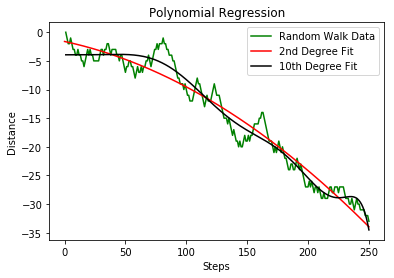

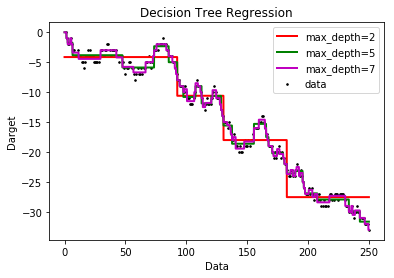

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

steps=250

distance=0
x=0
distance_list=[]
steps_list=[]
while x<steps:
    distance+=np.random.randint(-1,2)
    distance_list.append(distance)
    x+=1
    steps_list.append(x)
plt.plot(steps_list,distance_list, color='green', label="Random Walk Data")

steps_list=np.asarray(steps_list)
distance_list=np.asarray(distance_list)

X=steps_list[:,np.newaxis]

#Polynomial fits

#Degree 2
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

lin_reg=LinearRegression()
poly_fit=lin_reg.fit(X_poly,distance_list)
b=lin_reg.coef_
c=lin_reg.intercept_
print ("2nd degree coefficients:")
print ("zero power: ",c)
print ("first power: ", b[0])
print ("second power: ",b[1])

z = np.arange(0, steps, .01)
z_mod=b[1]*z**2+b[0]*z+c

fit_mod=b[1]*X**2+b[0]*X+c
plt.plot(z, z_mod, color='r', label="2nd Degree Fit")
plt.title("Polynomial Regression")

plt.xlabel("Steps")
plt.ylabel("Distance")

#Degree 10
poly_features10=PolynomialFeatures(degree=10, include_bias=False)
X_poly10=poly_features10.fit_transform(X)

poly_fit10=lin_reg.fit(X_poly10,distance_list)

y_plot=poly_fit10.predict(X_poly10)
plt.plot(X, y_plot, color='black', label="10th Degree Fit")

plt.legend()
plt.show()


#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)
regr_3=DecisionTreeRegressor(max_depth=7)
regr_1.fit(X, distance_list)
regr_2.fit(X, distance_list)
regr_3.fit(X, distance_list)

X_test = np.arange(0.0, steps, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3=regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, distance_list, s=2.5, c="black", label="data")
plt.plot(X_test, y_1, color="red",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="m", label="max_depth=7", linewidth=2)

plt.xlabel("Data")
plt.ylabel("Darget")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()